<a href="https://colab.research.google.com/github/felixjay3/planets/blob/main/Dataloaders_WandB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataLoaders - Reading, Writing, Saving
## Reading & Saving

In [ ]:
import numpy as np

# npy

tmp_array = np.ones((3,3))
np.save("tmp_array.npy", tmp_array)
read_array = np.load("tmp_array.npy")

tmp_array_pkl = np.array([[0,1],[2,3,4],[5,6,7,8]], dtype=object)
np.save("tmp_array_pkl.npy", tmp_array_pkl, allow_pickle=True)
read_array_pkl = np.load("tmp_array_pkl.npy", allow_pickle=True)

print(read_array)
print(read_array_pkl)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[list([0, 1]) list([2, 3, 4]) list([5, 6, 7, 8])]


In [ ]:
# npz
np.savez('tmp.npz', tmp_array=tmp_array, tmp_array_pkl=tmp_array_pkl)
npz_data = np.load('tmp.npz', allow_pickle=True, encoding='bytes')
read_array = npz_data['tmp_array']
read_array_pkl = npz_data['tmp_array_pkl']

print(read_array)
print(read_array_pkl)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[list([0, 1]) list([2, 3, 4]) list([5, 6, 7, 8])]


In [ ]:
# csv
import pandas as pd

output = pd.DataFrame()
output['id'] = np.array(range(10))
output['label'] = np.array(range(10,20))
print(output.head())

   id  label
0   0     10
1   1     11
2   2     12
3   3     13
4   4     14


In [ ]:
output.to_csv("submission.csv", index = False)

output_read = pd.read_csv("submission.csv")
print(output_read.head())

   id  label
0   0     10
1   1     11
2   2     12
3   3     13
4   4     14


## Custom Dataset & Dataloader

In [1]:
xs = list(range(10))
ys = list(range(10,20))
print('xs values: ', xs)
print('ys values: ', ys)

xs values:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ys values:  [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [2]:
data = list(zip(xs,ys))
data[0] # returns the tuple (x[0], y[0])

(0, 10)

In [3]:
len(data)

10

In [4]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, xs, ys):
        self.xs = xs
        self.ys = ys

    def __len__(self):
        return len(self.xs)  #len(self.ys)

    def __getitem__(self, i):
        return self.xs[i], self.ys[i]

In [5]:
dataset = MyDataset(xs, ys)
dataset[0] # returns the tuple (x[2], y[2])

(0, 10)

In [6]:
from torch.utils.data import DataLoader

for x, y in DataLoader(dataset):
    print(x,y)

tensor([0]) tensor([10])
tensor([1]) tensor([11])
tensor([2]) tensor([12])
tensor([3]) tensor([13])
tensor([4]) tensor([14])
tensor([5]) tensor([15])
tensor([6]) tensor([16])
tensor([7]) tensor([17])
tensor([8]) tensor([18])
tensor([9]) tensor([19])


In [7]:
for x, y in DataLoader(dataset, batch_size=2):
    print(x)
    print(y)
    print(x.shape)
    print(y.shape)

tensor([0, 1])
tensor([10, 11])
torch.Size([2])
torch.Size([2])
tensor([2, 3])
tensor([12, 13])
torch.Size([2])
torch.Size([2])
tensor([4, 5])
tensor([14, 15])
torch.Size([2])
torch.Size([2])
tensor([6, 7])
tensor([16, 17])
torch.Size([2])
torch.Size([2])
tensor([8, 9])
tensor([18, 19])
torch.Size([2])
torch.Size([2])


In [8]:
# enumerate
for index, (x, y) in enumerate(DataLoader(dataset, batch_size=2, shuffle=True)):
    print("index: ", index, "x,y:", x,y)

index:  0 x,y: tensor([5, 2]) tensor([15, 12])
index:  1 x,y: tensor([7, 3]) tensor([17, 13])
index:  2 x,y: tensor([0, 9]) tensor([10, 19])
index:  3 x,y: tensor([4, 6]) tensor([14, 16])
index:  4 x,y: tensor([8, 1]) tensor([18, 11])


In [9]:
# Training
train_loader_args = dict(shuffle=True, batch_size=2, num_workers=2, pin_memory=True)
train_loader = DataLoader(dataset, **train_loader_args)

In [10]:
# enumerate
for index, (x, y) in enumerate(train_loader):
    print("index: ", index, "x,y:", x,y)

index:  0 x,y: tensor([7, 6]) tensor([17, 16])
index:  1 x,y: tensor([4, 2]) tensor([14, 12])
index:  2 x,y: tensor([5, 3]) tensor([15, 13])
index:  3 x,y: tensor([9, 0]) tensor([19, 10])
index:  4 x,y: tensor([1, 8]) tensor([11, 18])


## Torch Dataset & Dataloader

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# FashionMNIST dataset from TorchVision
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

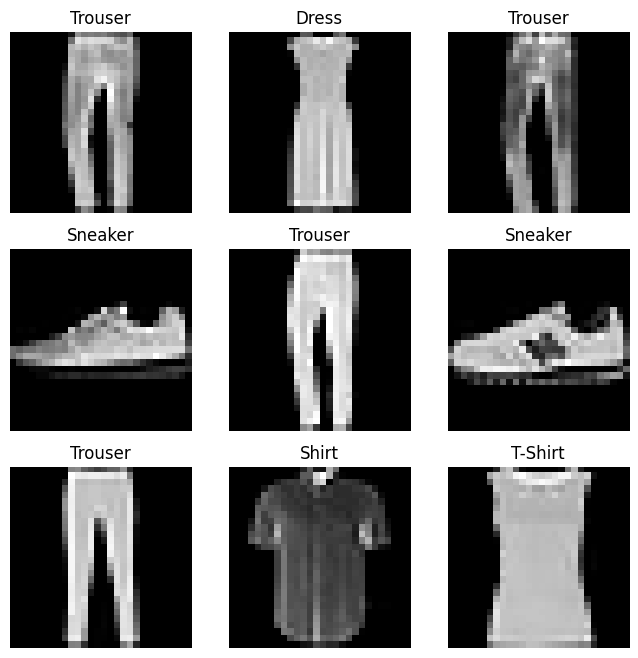

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
torch.Size([1, 28, 28])
torch.Size([28, 28])


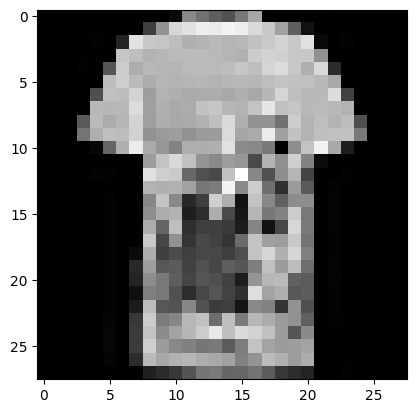

Label: 0


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
print(train_features[0].shape)
img = train_features[0].squeeze()
print(img.shape)
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Custom Image Dataset

In [ ]:
#Save MNIST images in zip and labels in annotations file

train_images_custom = []
train_labels_custom = []
for i in range(10):
  train_images_custom.append(training_data[i][0].numpy())
  train_labels_custom.append(training_data[i][1])

images_npy = np.array(train_images_custom)
np.save("images_npy.npy", images_npy)

labels_npy = np.array(train_labels_custom)
np.save("labels_npy.npy", labels_npy)


In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, images_npy, labels_npy):
        self.imgs = np.load(images_npy)
        self.img_labels = np.load(labels_npy)

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = self.imgs[idx]
        label = self.img_labels[idx]
        return image, label

    def collate_fn(self,batch):
      xs, ys = zip(*batch)

      #For demo - padding border
      xs = [np.pad(x_i, ((0,0),(20, 20), (20, 20)), constant_values=0) for x_i in list(xs) ]
      return tuple(xs), ys


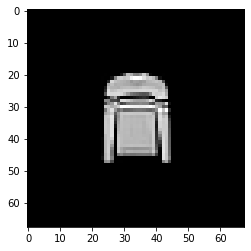

Label: tensor([18, 10])


In [ ]:
train_data_custom = CustomImageDataset("images_npy.npy", "labels_npy.npy")
train_args = dict(batch_size=2, shuffle=True, collate_fn= train_data_custom.collate_fn)
train_dataloader_custom = DataLoader(train_data_custom, **train_args)

# Display image and label.
train_features, train_labels = next(iter(train_dataloader_custom))
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
"""Some references:

    1. Numpy save and load - https://numpy.org/doc/stable/reference/generated/numpy.save.html
                             https://numpy.org/doc/stable/reference/generated/numpy.load.html
                             https://numpy.org/doc/stable/reference/generated/numpy.savez.html#numpy.savez

    2. Pandas read and save csv - https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
                                  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

    2. Pytorch Datasets and Datloader - https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
                                        https://pytorch.org/docs/stable/data.html

"""

# Monitoring Training using Weights and Biases (WandB)

## What is WandB?
Weights & Biases (WandB) is a python package that allows us to monitor our training in real-time. It can be easily integrated with popular deep learning frameworks like Pytorch, Tensorflow, or Keras. Additionally, it allows us to organize our Runs into Projects where we can easily compare them and identify the best performing model. In this guide, we will learn how to use WandB for logging.

In [ ]:
%pip install wandb -q
import wandb
wandb.login()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# Initialize WandB
wandb.init(project='fmnist_project', entity='maomer')

wandb: Currently logged in as: maomer. Use `wandb login --relogin` to force relogin


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Create datasets for training & validation, download if necessary
training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)

# Create data loaders for our datasets; shuffle for training, not for validation
training_loader = torch.utils.data.DataLoader(training_set, batch_size=60, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=10, shuffle=False)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Report split sizes
print('Training set has {} instances'.format(len(training_set)))
print('Validation set has {} instances'.format(len(validation_set)))

100%|██████████| 26421880/26421880 [00:01<00:00, 15674236.41it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 270686.35it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4957391.77it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9588044.85it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Training set has 60000 instances
Validation set has 10000 instances


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# PyTorch models inherit from torch.nn.Module
class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = GarmentClassifier()

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()

# NB: Loss functions expect data in batches, so we're creating batches of 4
# Represents the model's confidence in each of the 10 classes for a given input
dummy_outputs = torch.rand(4, 10)
# Represents the correct class among the 10 being tested
dummy_labels = torch.tensor([1, 5, 3, 7])

print(dummy_outputs)
print(dummy_labels)

loss = loss_fn(dummy_outputs, dummy_labels)
print('Total loss for this batch: {}'.format(loss.item()))

tensor([[0.4010, 0.9824, 0.7652, 0.0082, 0.3153, 0.5429, 0.8819, 0.5957, 0.7540,
         0.1834],
        [0.5030, 0.6923, 0.9700, 0.5327, 0.6282, 0.8563, 0.8078, 0.3734, 0.9512,
         0.4024],
        [0.1514, 0.0455, 0.7546, 0.4874, 0.3141, 0.7089, 0.0408, 0.3677, 0.4466,
         0.7399],
        [0.5227, 0.8678, 0.6673, 0.3845, 0.8935, 0.4776, 0.7758, 0.2704, 0.4787,
         0.0435]])
tensor([1, 5, 3, 7])
Total loss for this batch: 2.2255301475524902


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:

wandb.watch(model, loss_fn)

[]

In [ ]:
def train_one_epoch():
    running_loss = 0.
    last_loss = 0.
    correct = 0
    prediction_list = []
    total = 0
    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting

    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        predictions = torch.max(outputs, 1)[1]
        prediction_list.append(predictions)
        correct += (predictions == labels).sum()

        total += len(labels)

    accuracy = correct * 100 / total

    avg_loss = running_loss / (i+1) # loss per batch

    return avg_loss, accuracy

In [ ]:
# Initializing in a separate cell so we can easily add more epochs to the same run

EPOCHS = 100


for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss, avg_acc = train_one_epoch()


    running_vloss = 0.0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        prediction_listv = []
        correctv = 0
        totalv = 0
        for i, vdata in enumerate(validation_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss
            predictionsv = torch.max(voutputs, 1)[1]
            prediction_listv.append(predictionsv)
            correctv += (predictionsv == vlabels).sum()

            totalv += len(vlabels)

    accuracy_valid = correctv * 100 / totalv
    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))
    print('ACC train {} valid {}'.format(avg_acc, accuracy_valid))


    # Log the running loss averaged per batch
    # for both training and validation
    wandb.log({
        "Epoch": (epoch+1),
        "Train Loss": avg_loss,
        "Valid Loss": avg_vloss,
        "Train Acc":avg_acc,
        "Valid Acc": accuracy_valid})


EPOCH 1:
LOSS train 1.7064150984883308 valid 0.7987259030342102
ACC train 36.91999816894531 valid 70.75
EPOCH 2:
LOSS train 0.6776801473796368 valid 0.6372979283332825
ACC train 74.23666381835938 valid 75.75
EPOCH 3:
LOSS train 0.5720613241195679 valid 0.5628799796104431
ACC train 78.22333526611328 valid 78.41000366210938
EPOCH 4:
LOSS train 0.5163080155998468 valid 0.5175269842147827
ACC train 80.78166961669922 valid 80.68000030517578
EPOCH 5:
LOSS train 0.47426905170083045 valid 0.48243290185928345
ACC train 82.45500183105469 valid 82.08999633789062
EPOCH 6:
LOSS train 0.4443372343480587 valid 0.4569040536880493
ACC train 83.83000183105469 valid 83.55999755859375
EPOCH 7:
LOSS train 0.422935411542654 valid 0.4673013687133789
ACC train 84.57833099365234 valid 82.62999725341797
EPOCH 8:
LOSS train 0.40185358487069606 valid 0.4235183000564575
ACC train 85.34166717529297 valid 85.12999725341797
EPOCH 9:
LOSS train 0.38599198842048643 valid 0.4035215377807617
ACC train 85.95333099365234 v

KeyboardInterrupt: 